### CML

In [1]:
import pandas as pd
import numpy as np
import os

current_path = os.getcwd()

US_treasury_rate_path = f"{current_path}//US_yield_hourly.csv"

print(current_path)

c:\Users\sghia\OneDrive\Documents\Company_Corp_Project\Funding_rate_Aave\Saam


In [2]:
rates_path = f"{current_path[:-4]}Nasim\\rates_data.csv"

print(rates_path)

c:\Users\sghia\OneDrive\Documents\Company_Corp_Project\Funding_rate_Aave\Nasim\rates_data.csv


In [3]:
df_treasury_rates = pd.read_csv(US_treasury_rate_path, sep =",")

df_borrowing_rates = pd.read_csv(rates_path, sep =",")


print(df_treasury_rates.head())

print(df_borrowing_rates.head())

   Unnamed: 0             datetime     value
0           0  2020-01-08 00:00:00  0.000021
1           1  2020-01-08 01:00:00  0.000021
2           2  2020-01-08 02:00:00  0.000021
3           3  2020-01-08 03:00:00  0.000021
4           4  2020-01-08 04:00:00  0.000021
  Symbol            Timestamp  liquidityRate_avg  variableBorrowRate_avg  \
0    DAI  2021-06-26 12:00:00           0.030049                0.044036   
1    DAI  2021-06-26 18:00:00           0.022864                0.033511   
2    DAI  2021-06-27 00:00:00           0.026457                0.038576   
3    DAI  2021-06-27 06:00:00           0.023205                0.033815   
4    DAI  2021-06-27 12:00:00           0.026452                0.038146   

   utilizationRate_avg  stableBorrowRate_avg  
0             0.741302              0.118596  
1             0.740801              0.118584  
2             0.743568              0.118653  
3             0.745587              0.118703  
4             0.747147              0.

In [4]:
hours_per_year = 24*365
df_borrowing_rates["variableBorrowRate_avg"] = np.exp(df_borrowing_rates["variableBorrowRate_avg"]/hours_per_year)-1
df_borrowing_rates["liquidityRate_avg"] = np.exp(df_borrowing_rates["liquidityRate_avg"]/hours_per_year)-1
df_borrowing_rates["stableBorrowRate_avg"] = np.exp(df_borrowing_rates["stableBorrowRate_avg"]/hours_per_year)-1


df_borrowing_rates.head()

,Symbol,Timestamp,liquidityRate_avg,variableBorrowRate_avg,utilizationRate_avg,stableBorrowRate_avg
0,DAI,2021-06-26 12:00:00,0.000003,0.000005,0.741302,0.000014
1,DAI,2021-06-26 18:00:00,0.000003,0.000004,0.740801,0.000014
2,DAI,2021-06-27 00:00:00,0.000003,0.000004,0.743568,0.000014
3,DAI,2021-06-27 06:00:00,0.000003,0.000004,0.745587,0.000014
4,DAI,2021-06-27 12:00:00,0.000003,0.000004,0.747147,0.000014


In [5]:
print(df_borrowing_rates["Symbol"].unique())

['DAI' 'TUSD' 'USDC' 'USDT' 'SUSD' 'BAT' 'LINK' 'KNC' 'MKR' 'MANA' 'ZRX'
 'SNX' 'WBTC' 'BUSD' 'ENJ' 'REN' 'YFI' 'AAVE' 'UNI' 'AUSDT' 'AWBTC'
 'AWETH' 'AYFI' 'AZRX' 'AUNI' 'AAAVE' 'ABAT' 'ABUSD' 'ADAI' 'AENJ' 'AKNC'
 'ALINK' 'AMANA' 'AMKR' 'AREN' 'ASNX' 'ASUSD' 'ATUSD' 'AUSDC' 'ACRV'
 'AGUSD' 'ABAL' 'AXSUSHI' 'ARENFIL' 'ARAI' 'AAMPL' 'AUSDP' 'ADPI' 'AFRAX'
 'AFEI' 'ASTETH' 'AENS' 'AUST' 'ACVX' 'A1INCH' 'ALUSD' 'AAMMWETH'
 'AAMMDAI' 'AAMMUSDC' 'AAMMUSDT' 'AAMMWBTC' 'WETH' 'LUSD' 'CRV' 'BAL'
 'ENS' '1INCH' 'FRAX']


In [6]:
print(df_borrowing_rates["Symbol"].nunique())

68


In [7]:
import mysql.connector

# Connect to the database
connection = mysql.connector.connect(
            host="crypto-matter.c5eq66ogk1mf.eu-central-1.rds.amazonaws.com",
            user="Saam",
            passwd="Stitcheson12!",
            database="Crypto"
        )

cursor = connection.cursor()

Query = """SELECT*
FROM crypto_price
WHERE crypto_price.date >= '2020-01-08 00:00:00';
"""

cursor.execute(Query)

data = cursor.fetchall()

columns = [column[0] for column in cursor.description]

df_price = pd.DataFrame(data, columns=columns)

cursor.close()
connection.close()

df_price.head()

,crypto_symbol,date,high,low,close,adj_close,volume,market_cap,coin_supply,id,open
0,1INCHUSDT,2020-12-25 05:00:00,3.08850,0.20000,2.58260,2.58260,13125130,None,None,87981,0.20000
1,1INCHUSDT,2020-12-25 06:00:00,2.69000,2.22490,2.50590,2.50590,9270672,None,None,87982,2.58240
2,1INCHUSDT,2020-12-25 07:00:00,2.88700,2.36090,2.62370,2.62370,7923760,None,None,87983,2.51520
3,1INCHUSDT,2020-12-25 08:00:00,2.82470,2.46500,2.61340,2.61340,6625565,None,None,87984,2.63180
4,1INCHUSDT,2020-12-25 09:00:00,2.74980,2.56290,2.63650,2.63650,3739132,None,None,87985,2.61040


In [8]:
df_price["crypto_symbol"] = df_price["crypto_symbol"].str.replace("USDT", "", regex=False)

print(df_price["crypto_symbol"].unique())

['1INCH' 'AAVE' 'ARB' 'BAL' 'BAT' 'BTC' 'BUSD' 'CAKE' 'CRV' 'DAI' 'ENJ'
 'ENS' 'ETH' 'FDUSD' 'FXS' 'GHST' 'GNO' 'KNC' 'LDO' 'LEND' 'LINK' 'MANA'
 'METIS' 'MKR' 'OP' 'REN' 'REP' 'RPL' 'SNX' 'STG' 'SUSD' 'SUSHI' 'TUSD'
 'UNI' 'USDC' 'WBTC' 'YFI' 'ZRX']


In [9]:
df_borrowing_rates["date"] = df_borrowing_rates["Timestamp"]
df_borrowing_rates.drop(columns=["Timestamp"], inplace=True)

In [10]:
print(df_borrowing_rates["Symbol"].unique())

['DAI' 'TUSD' 'USDC' 'USDT' 'SUSD' 'BAT' 'LINK' 'KNC' 'MKR' 'MANA' 'ZRX'
 'SNX' 'WBTC' 'BUSD' 'ENJ' 'REN' 'YFI' 'AAVE' 'UNI' 'AUSDT' 'AWBTC'
 'AWETH' 'AYFI' 'AZRX' 'AUNI' 'AAAVE' 'ABAT' 'ABUSD' 'ADAI' 'AENJ' 'AKNC'
 'ALINK' 'AMANA' 'AMKR' 'AREN' 'ASNX' 'ASUSD' 'ATUSD' 'AUSDC' 'ACRV'
 'AGUSD' 'ABAL' 'AXSUSHI' 'ARENFIL' 'ARAI' 'AAMPL' 'AUSDP' 'ADPI' 'AFRAX'
 'AFEI' 'ASTETH' 'AENS' 'AUST' 'ACVX' 'A1INCH' 'ALUSD' 'AAMMWETH'
 'AAMMDAI' 'AAMMUSDC' 'AAMMUSDT' 'AAMMWBTC' 'WETH' 'LUSD' 'CRV' 'BAL'
 'ENS' '1INCH' 'FRAX']


In [11]:
df_treasury_rates["date"] = df_treasury_rates["datetime"]

df_treasury_rates.drop(columns=["datetime"], inplace=True)

In [12]:
df_merged = pd.merge(df_borrowing_rates, df_treasury_rates, how='left', on='date')

df_merged.head()

,Symbol,liquidityRate_avg,variableBorrowRate_avg,utilizationRate_avg,stableBorrowRate_avg,date,Unnamed: 0,value
0,DAI,0.000003,0.000005,0.741302,0.000014,2021-06-26 12:00:00,12852.0,6.481484e-07
1,DAI,0.000003,0.000004,0.740801,0.000014,2021-06-26 18:00:00,12858.0,6.481484e-07
2,DAI,0.000003,0.000004,0.743568,0.000014,2021-06-27 00:00:00,12864.0,6.018520e-07
3,DAI,0.000003,0.000004,0.745587,0.000014,2021-06-27 06:00:00,12870.0,6.018520e-07
4,DAI,0.000003,0.000004,0.747147,0.000014,2021-06-27 12:00:00,12876.0,6.018520e-07


In [13]:
df_price["Symbol"] = df_price["crypto_symbol"] 
df_price.drop(columns=["crypto_symbol"], inplace=True)

In [14]:
print(df_price.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1087649 entries, 0 to 1087648
Data columns (total 11 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   date         1087649 non-null  datetime64[ns]
 1   high         1087649 non-null  object        
 2   low          1087649 non-null  object        
 3   close        1087649 non-null  object        
 4   adj_close    1087649 non-null  object        
 5   volume       1087649 non-null  int64         
 6   market_cap   0 non-null        object        
 7   coin_supply  0 non-null        object        
 8   id           1087649 non-null  int64         
 9   open         1087649 non-null  object        
 10  Symbol       1087649 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(8)
memory usage: 91.3+ MB
None


In [15]:
print(df_merged.info())

df_merged["date"] = pd.to_datetime(df_merged["date"], errors="coerce")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304074 entries, 0 to 304073
Data columns (total 8 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Symbol                  304074 non-null  object 
 1   liquidityRate_avg       304074 non-null  float64
 2   variableBorrowRate_avg  304074 non-null  float64
 3   utilizationRate_avg     304074 non-null  float64
 4   stableBorrowRate_avg    304074 non-null  float64
 5   date                    304074 non-null  object 
 6   Unnamed: 0              274398 non-null  float64
 7   value                   274398 non-null  float64
dtypes: float64(6), object(2)
memory usage: 18.6+ MB
None


In [16]:
print(df_merged.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304074 entries, 0 to 304073
Data columns (total 8 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   Symbol                  304074 non-null  object        
 1   liquidityRate_avg       304074 non-null  float64       
 2   variableBorrowRate_avg  304074 non-null  float64       
 3   utilizationRate_avg     304074 non-null  float64       
 4   stableBorrowRate_avg    304074 non-null  float64       
 5   date                    274398 non-null  datetime64[ns]
 6   Unnamed: 0              274398 non-null  float64       
 7   value                   274398 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 18.6+ MB
None


In [17]:
df_merged['Symbol'] = df_merged['Symbol'].str.strip()
df_price['Symbol'] = df_price['Symbol'].str.strip()

In [18]:
df_merged_1 = pd.merge(df_merged,df_price, how="left", on=["date","Symbol"] )

In [19]:
print(df_merged_1.head())

  Symbol  liquidityRate_avg  variableBorrowRate_avg  utilizationRate_avg  \
0    DAI           0.000003                0.000005             0.741302   
1    DAI           0.000003                0.000004             0.740801   
2    DAI           0.000003                0.000004             0.743568   
3    DAI           0.000003                0.000004             0.745587   
4    DAI           0.000003                0.000004             0.747147   

   stableBorrowRate_avg                date  Unnamed: 0         value high  \
0              0.000014 2021-06-26 12:00:00     12852.0  6.481484e-07  NaN   
1              0.000014 2021-06-26 18:00:00     12858.0  6.481484e-07  NaN   
2              0.000014 2021-06-27 00:00:00     12864.0  6.018520e-07  NaN   
3              0.000014 2021-06-27 06:00:00     12870.0  6.018520e-07  NaN   
4              0.000014 2021-06-27 12:00:00     12876.0  6.018520e-07  NaN   

   low close adj_close  volume market_cap coin_supply  id open  
0  NaN   

In [20]:
df_merged_1_cleaned = df_merged_1.dropna(subset=['low']).copy()

print(df_merged_1_cleaned)

       Symbol  liquidityRate_avg  variableBorrowRate_avg  utilizationRate_avg  \
4688     TUSD       3.747827e-09            9.201732e-09             0.347702   
4689     TUSD       1.387579e-06            3.406420e-06             0.347942   
4690     TUSD       7.394939e-07            1.814085e-06             0.348706   
4691     TUSD       2.655150e-07            6.508745e-07             0.348727   
4692     TUSD       1.774680e-06            4.350293e-06             0.348820   
...       ...                ...                     ...                  ...   
299584  1INCH       1.568401e-10            7.523262e-05             4.900089   
299585  1INCH       1.568401e-10            7.523262e-05             4.900089   
299586  1INCH       1.568401e-10            7.523262e-05             4.900089   
299587  1INCH       1.568401e-10            7.523262e-05             4.900089   
299588  1INCH       1.568401e-10            7.523262e-05             4.900089   

        stableBorrowRate_av

In [21]:
print(df_merged_1_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
Index: 78393 entries, 4688 to 299588
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Symbol                  78393 non-null  object        
 1   liquidityRate_avg       78393 non-null  float64       
 2   variableBorrowRate_avg  78393 non-null  float64       
 3   utilizationRate_avg     78393 non-null  float64       
 4   stableBorrowRate_avg    78393 non-null  float64       
 5   date                    78393 non-null  datetime64[ns]
 6   Unnamed: 0              78393 non-null  float64       
 7   value                   78393 non-null  float64       
 8   high                    78393 non-null  object        
 9   low                     78393 non-null  object        
 10  close                   78393 non-null  object        
 11  adj_close               78393 non-null  object        
 12  volume                  78393 non-null  float64

In [22]:
df_merged_1_cleaned.drop(columns=["Unnamed: 0"], inplace=True)

In [23]:
columns = df_merged_1_cleaned.columns.to_list()

columns.remove("date")
columns.remove("Symbol")

print(columns)

for col in columns:
    df_merged_1_cleaned[col] = df_merged_1_cleaned[col].astype(float)

['liquidityRate_avg', 'variableBorrowRate_avg', 'utilizationRate_avg', 'stableBorrowRate_avg', 'value', 'high', 'low', 'close', 'adj_close', 'volume', 'market_cap', 'coin_supply', 'id', 'open']


In [24]:
df_merged_1_cleaned["borrow_cost"] = (df_merged_1_cleaned["variableBorrowRate_avg"]+1)*df_merged_1_cleaned["adj_close"]

In [25]:
file_path_test = f"{current_path}\\test_data.xlsx"

df_merged_1_cleaned.to_excel(file_path_test)

In [26]:
market_series = df_merged_1_cleaned.groupby(df_merged_1_cleaned["date"])["borrow_cost"].mean()


In [27]:
df_merged_1_cleaned.head()

,Symbol,liquidityRate_avg,variableBorrowRate_avg,utilizationRate_avg,stableBorrowRate_avg,date,value,high,low,close,adj_close,volume,market_cap,coin_supply,id,open,borrow_cost
4688,TUSD,3.747827e-09,9.201732e-09,0.347702,0.000012,2021-06-26 12:00:00,6.481484e-07,1.0001,0.9999,0.9999,0.9999,220326.0,NaN,NaN,1070627.0,1.0000,0.999900
4689,TUSD,1.387579e-06,3.406420e-06,0.347942,0.000012,2021-06-26 18:00:00,6.481484e-07,1.0001,1.0000,1.0000,1.0000,108218.0,NaN,NaN,1070633.0,1.0001,1.000003
4690,TUSD,7.394939e-07,1.814085e-06,0.348706,0.000012,2021-06-27 00:00:00,6.018520e-07,1.0001,0.9999,0.9999,0.9999,351941.0,NaN,NaN,1070639.0,1.0001,0.999902
4691,TUSD,2.655150e-07,6.508745e-07,0.348727,0.000012,2021-06-27 06:00:00,6.018520e-07,0.9999,0.9998,0.9999,0.9999,148603.0,NaN,NaN,1070645.0,0.9998,0.999901
4692,TUSD,1.774680e-06,4.350293e-06,0.348820,0.000012,2021-06-27 12:00:00,6.018520e-07,0.9998,0.9997,0.9997,0.9997,58589.0,NaN,NaN,1070651.0,0.9998,0.999704


In [28]:
df_merged_1_cleaned['log_return'] = df_merged_1_cleaned.groupby('Symbol')['borrow_cost'].transform(lambda x: np.log(x / x.shift(1)))

In [29]:
df_merged_1_cleaned = df_merged_1_cleaned.dropna(subset=['log_return'])

In [30]:
print(df_merged_1_cleaned["log_return"])

4689      0.000103
4690     -0.000102
4691     -0.000001
4692     -0.000196
4693      0.000298
            ...   
299584    0.007707
299585   -0.011972
299586   -0.010938
299587    0.030557
299588    0.014748
Name: log_return, Length: 78372, dtype: float64


In [31]:
coins_expected_returns = df_merged_1_cleaned.groupby(df_merged_1_cleaned["Symbol"])["log_return"].mean()
coins_risk = df_merged_1_cleaned.groupby(df_merged_1_cleaned["Symbol"])["log_return"].std()

In [32]:
print(coins_expected_returns)
print(coins_risk)

Symbol
1INCH   -3.455120e-04
AAVE    -8.956574e-05
BAL     -5.093130e-04
BAT     -2.654437e-04
BUSD     7.608712e-08
CRV     -4.094491e-04
ENJ     -4.566959e-04
ENS      7.373151e-06
KNC     -2.670313e-04
LINK    -1.179528e-04
MANA    -1.357130e-04
MKR     -3.950150e-05
REN     -5.065943e-04
SNX     -3.556902e-04
SUSD    -1.716744e-05
TUSD    -5.527166e-08
UNI     -2.426123e-04
USDC    -2.300162e-08
WBTC     3.570873e-04
YFI     -4.147905e-04
ZRX     -1.579411e-04
Name: log_return, dtype: float64
Symbol
1INCH    0.024429
AAVE     0.027669
BAL      0.024240
BAT      0.025719
BUSD     0.000928
CRV      0.031436
ENJ      0.028977
ENS      0.032204
KNC      0.030263
LINK     0.025397
MANA     0.030248
MKR      0.025738
REN      0.033969
SNX      0.031807
SUSD     0.002158
TUSD     0.001236
UNI      0.026896
USDC     0.001588
WBTC     0.012672
YFI      0.025000
ZRX      0.031738
Name: log_return, dtype: float64


In [33]:
market_log_returns = np.log(market_series / market_series.shift(1))
market_log_returns = market_log_returns.dropna()

market_mean = market_log_returns.mean()
market_risk = market_log_returns.std()

In [34]:
print(market_mean)
print(market_risk)

0.0006648246432589423
0.03275027843111266


In [35]:
import matplotlib.pyplot as plt

rf = df_merged_1_cleaned["value"].iloc[-1]

market_sharpe = (market_mean-rf)/market_risk + rf

coins_sharpe = (coins_expected_returns-rf)/coins_risk + rf
print(coins_sharpe)

Symbol
1INCH   -0.017189
AAVE    -0.005917
BAL     -0.024081
BAT     -0.013209
BUSD    -0.081993
CRV     -0.015374
ENJ     -0.018316
ENS     -0.002063
KNC     -0.011267
LINK    -0.007570
MANA    -0.006931
MKR     -0.004421
REN     -0.017082
SNX     -0.013504
SUSD    -0.043220
TUSD    -0.061667
UNI     -0.011779
USDC    -0.047946
WBTC     0.022237
YFI     -0.019565
ZRX     -0.007303
Name: log_return, dtype: float64


C:\Users\sghia\AppData\Local\Temp\ipykernel_18988\3384032709.py:29: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(coin, (coins_risk[i], coins_expected_returns[i]),


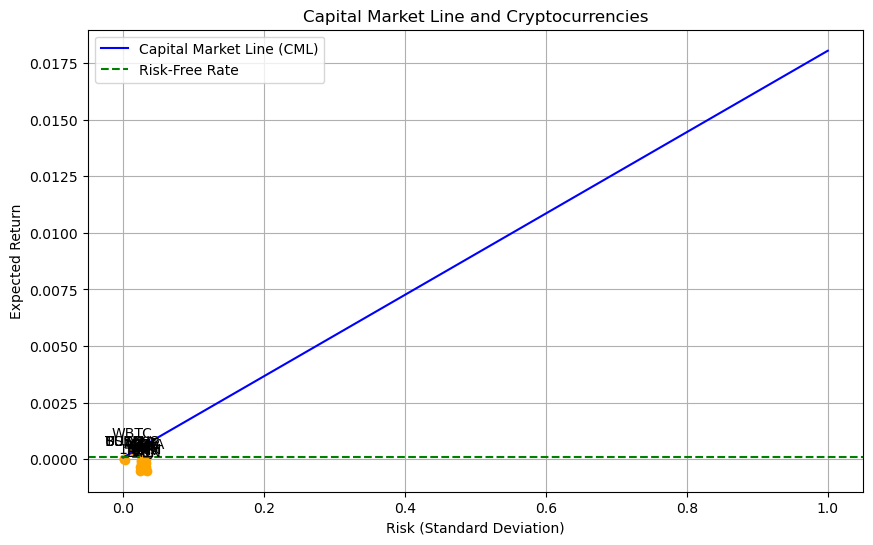

In [36]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming the following variables are defined:
# market_mean = ...  # Expected return of the market
# rf = df_merged_1_cleaned["value"].iloc[-1]  # Risk-free rate
# market_risk = ...  # Standard deviation of the market returns
# coins_risk = ...  # Standard deviations (risks) of the coins
# coins_expected_returns = ...  # Expected returns of the coins, with names as index

# Calculate the market Sharpe ratio and the expected return on the CML
x_values = np.linspace(0, 1, 2)  # Different risk levels
market_sharpe = (market_mean - rf) / market_risk + rf

# Calculate CML returns for the x_values (risk levels)
cml_returns = rf + ((market_mean - rf) / market_risk) * x_values

# Create the plot
plt.figure(figsize=(10, 6))

# Plot the Capital Market Line
plt.plot(x_values, cml_returns, label='Capital Market Line (CML)', color='blue')

# Plot the assets
scatter = plt.scatter(coins_risk, coins_expected_returns, color='orange')

# Annotate each point with the corresponding coin name
for i, coin in enumerate(coins_expected_returns.index):
    plt.annotate(coin, (coins_risk[i], coins_expected_returns[i]), 
                 textcoords="offset points",  # How to position the text
                 xytext=(0, 10),  # Distance from the point (x,y)
                 ha='center')  # Horizontal alignment

# Add labels and legend
plt.title('Capital Market Line and Cryptocurrencies')
plt.xlabel('Risk (Standard Deviation)')
plt.ylabel('Expected Return')
plt.axhline(y=rf, color='green', linestyle='--', label='Risk-Free Rate')
plt.legend()
plt.grid()
plt.show()
